In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
def step(scheduler: torch.optim.lr_scheduler.LRScheduler, max):
    for _ in range(max):
        scheduler.step()
        yield scheduler.get_lr()

def get_optim():
    return torch.optim.Adam([torch.tensor(0)])

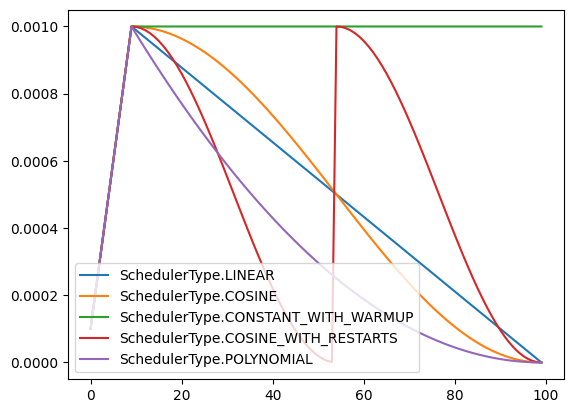

In [10]:
from diffusers.optimization import TYPE_TO_SCHEDULER_FUNCTION, SchedulerType

wu = 10
tr = 100
all_schedulers = [
    (t0 := SchedulerType.LINEAR, TYPE_TO_SCHEDULER_FUNCTION[t0](get_optim(), wu, tr)),
    (t1 := SchedulerType.COSINE, TYPE_TO_SCHEDULER_FUNCTION[t1](get_optim(), wu, tr,0.5)),
    (t2 := SchedulerType.CONSTANT_WITH_WARMUP, TYPE_TO_SCHEDULER_FUNCTION[t2](get_optim(), wu)),
    (t3 := SchedulerType.COSINE_WITH_RESTARTS, TYPE_TO_SCHEDULER_FUNCTION[t3](get_optim(), wu, tr,2)),
    (t4 := SchedulerType.POLYNOMIAL, TYPE_TO_SCHEDULER_FUNCTION[t4](get_optim(), wu, tr,power=2)),
]
all_lrs = []
all_labels= []
for scheduler in all_schedulers:
    lrs = []
    for lr in step(scheduler[1], tr):
        lrs.append(lr)
    all_labels.append(scheduler[0])
    all_lrs.append(lrs)
fig, ax = plt.subplots()
for label, lrs in zip(all_labels, all_lrs):
    ax.plot(lrs, linestyle='-', label=label)
ax.legend()
plt.show()